In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [37]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

In [45]:
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))

nb_classes = 3

In [48]:
W = tf.Variable(tf.random.normal([x_data.shape[1], nb_classes]), name='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')

print(dataset)

<TensorSliceDataset shapes: ((4,), (3,)), types: (tf.float32, tf.float32)>


In [40]:
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W)+b)

print(hypothesis(x_data))

tf.Tensor(
[[2.6178825e-01 2.1875215e-01 5.1945955e-01]
 [9.6412271e-01 1.3785313e-02 2.2091934e-02]
 [8.9354593e-01 9.0901405e-02 1.5552753e-02]
 [9.9484891e-01 4.7748303e-03 3.7622621e-04]
 [9.5212922e-02 9.0409797e-01 6.8911357e-04]
 [8.3021981e-01 1.6958715e-01 1.9307256e-04]
 [3.5969231e-01 6.4015341e-01 1.5431028e-04]
 [2.8281376e-01 7.1716076e-01 2.5458732e-05]], shape=(8, 3), dtype=float32)


In [41]:
sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

print(hypothesis(sample_db))

tf.Tensor([[0.12284401 0.12344541 0.75371057]], shape=(1, 3), dtype=float32)


In [42]:
def cost_fn(X, Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
    cost_mean = tf.reduce_mean(cost)
    
    return cost_mean

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
print(cost_fn(x_data, y_data))

tf.Tensor(2.2670128, shape=(), dtype=float32)


In [43]:
def grad(X, Y):
    with tf.GradientTape() as tape:
        loss_value = cost_fn(X, Y)
        return tape.gradient(loss_value, [W, b])
    
print(grad(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 1.0522507 , -0.3788593 , -0.67339146],
       [-0.39489067,  0.75948393, -0.36459324],
       [ 0.8217566 , -0.02673024, -0.7950263 ],
       [ 0.916712  , -0.12089235, -0.7958195 ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.3352806 , -0.03009837, -0.30518222], dtype=float32)>]


In [68]:
epoch = []
cost = []
def fit(X, Y, epochs = 3001):
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
    
    for i in range(epochs):
        grads = grad(X, Y)
        optimizer.apply_gradients(zip(grads, [W, b]))
        epoch.append(i)
        cost.append(cost_fn(X,Y).numpy())
        if i % 100 == 0:
            print('epoch: {}, cost: {:.4f}'.format(i, cost_fn(X, Y).numpy()))

In [69]:
fit(x_data, y_data)

epoch: 0, cost: 0.2489
epoch: 100, cost: 0.2475
epoch: 200, cost: 0.2462
epoch: 300, cost: 0.2449
epoch: 400, cost: 0.2436
epoch: 500, cost: 0.2423
epoch: 600, cost: 0.2410
epoch: 700, cost: 0.2397
epoch: 800, cost: 0.2385
epoch: 900, cost: 0.2372
epoch: 1000, cost: 0.2360
epoch: 1100, cost: 0.2348
epoch: 1200, cost: 0.2336
epoch: 1300, cost: 0.2324
epoch: 1400, cost: 0.2312
epoch: 1500, cost: 0.2300
epoch: 1600, cost: 0.2289
epoch: 1700, cost: 0.2277
epoch: 1800, cost: 0.2266
epoch: 1900, cost: 0.2255
epoch: 2000, cost: 0.2243
epoch: 2100, cost: 0.2232
epoch: 2200, cost: 0.2221
epoch: 2300, cost: 0.2211
epoch: 2400, cost: 0.2200
epoch: 2500, cost: 0.2189
epoch: 2600, cost: 0.2179
epoch: 2700, cost: 0.2168
epoch: 2800, cost: 0.2158
epoch: 2900, cost: 0.2148
epoch: 3000, cost: 0.2137


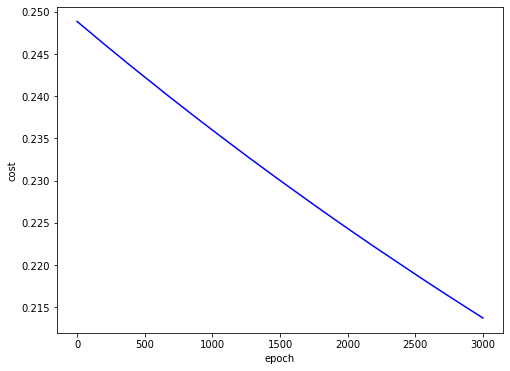

In [70]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(epoch, cost, "b")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

In [71]:
sample = [[1, 7, 7, 7]]
sample = np.asarray(sample, dtype = np.float32)

In [72]:
a = hypothesis(sample)
print(a)

tf.Tensor([[8.6078554e-01 1.3920636e-01 8.0830423e-06]], shape=(1, 3), dtype=float32)
